In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from sklearn import metrics

In [2]:
from tqdm.notebook import tqdm
import warnings

In [3]:
device_full_files = pd.DataFrame()
local = True

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
    for year in tqdm([2017, 2018, 2019, 2020, 2022, 2023]):
        if local:
            device_file = pd.read_csv('./data/device%d.zip' % year)
        else:
            device_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/device%d.zip' % year, sep='|', quoting=3, encoding = "ISO-8859-1")
            device_file.to_csv('./data/device%d.zip' % year, index = False)
        device_full_files = pd.concat([device_full_files, device_file], ignore_index=True)
    device_full_files.to_csv('./data/device_full_files.zip', index = False)        

  0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
# patient_filtered = patient[patient['GENERIC_NAME'].str.contains("MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR").fillna(False)]

In [61]:
device_file = pd.read_csv('./data/device2017.zip')

In [4]:
date_received_counts = device_full_files["DATE_RECEIVED"].value_counts().sort_index()

In [12]:
date_received_counts[2000:]

DATE_RECEIVED
2023/07/22                397
2023/07/24              10764
2023/07/25               7640
2023/07/26               8261
2023/07/27               8597
                        ...  
HAMBURG, .                  1
HAMBURG, DE                 8
HAMBURG, DEUTSCHLAND        2
HAMBURG, HAMBURG           13
ST.LOUIS                    2
Name: count, Length: 172, dtype: int64

In [62]:
device_file["DATE_RECEIVED"].value_counts()

DATE_RECEIVED
2017/12/07    8857
2017/06/08    7908
2017/04/06    7892
2017/02/09    7850
2017/08/09    7619
              ... 
2017/12/31      54
2017/03/25      45
2017/09/30      45
2017/04/01      10
2017/07/22       7
Name: count, Length: 358, dtype: int64

In [60]:
device_full_files["DATE_RECEIVED"].value_counts()

DATE_RECEIVED
2023/02/10    13938
2023/07/06    12725
2023/02/03    12495
2023/08/24    12306
2023/04/28    12264
              ...  
2023/06/08       20
2023/11/24       15
2023/07/08       10
2023/02/08        2
DA                1
Name: count, Length: 244, dtype: int64

In [5]:
device_full_files.columns

Index(['MDR_REPORT_KEY', 'DEVICE_EVENT_KEY', 'IMPLANT_FLAG',
       'DATE_REMOVED_FLAG', 'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED',
       'BRAND_NAME', 'GENERIC_NAME', 'MANUFACTURER_D_NAME',
       'MANUFACTURER_D_ADDRESS_1', 'MANUFACTURER_D_ADDRESS_2',
       'MANUFACTURER_D_CITY', 'MANUFACTURER_D_STATE_CODE',
       'MANUFACTURER_D_ZIP_CODE', 'MANUFACTURER_D_ZIP_CODE_EXT',
       'MANUFACTURER_D_COUNTRY_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'CATALOG_NUMBER', 'LOT_NUMBER', 'OTHER_ID_NUMBER',
       'DEVICE_AVAILABILITY', 'DATE_RETURNED_TO_MANUFACTURER',
       'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_AGE_TEXT',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'UDI-PUBLIC'],
      dtype='object')

In [13]:
foitext_files = pd.DataFrame()
local = True
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
    for year in tqdm([2017, 2018, 2019, 2020, 2022, 2023]):
        if local:
            foitext_file = pd.read_csv('./data/foitext%d.zip' % year)
        else:
            foitext_file = pd.read_csv('https://www.accessdata.fda.gov/MAUDE/ftparea/foitext%d.zip' % year, sep='|', quoting=3, encoding = "ISO-8859-1")
            foitext_file.to_csv('data/foitext%d.zip' % year, index = False)
        foitext_files = pd.concat([foitext_files, foitext_file], ignore_index=True)
    foitext_files.to_csv('./data/foitext_files.zip', index = False)        

  0%|          | 0/6 [00:00<?, ?it/s]

In [14]:
foitext_files.head()

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER   
0         7090002     100001150              N                        1  \
1         6822800     100001178              N                        1   
2         6934740     100001323              N                        1   
3         7146886     100001410              N                        1   
4         6925041     100001451              N                        1   

   DATE_REPORT                                           FOI_TEXT  
0          NaN  IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...  
1          NaN  A COMPLETE ANALYSIS AND TESTING OF THE INSULIN...  
2          NaN  PRODUCT EVENT SUMMARY: THE DEVICE WAS RETURNED...  
3          NaN  ADDITIONAL INFORMATION WAS RECEIVED THAT THE P...  
4          NaN  PRODUCT EVENT SUMMARY: THE FULL LEAD WAS RETUR...

In [15]:
foitext_files.shape

(24634316, 6)

In [10]:
foitext_files.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT'],
      dtype='object')

### Merge data

In [16]:
foitext_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24634316 entries, 0 to 24634315
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   MDR_REPORT_KEY           int64  
 1   MDR_TEXT_KEY             int64  
 2   TEXT_TYPE_CODE           object 
 3   PATIENT_SEQUENCE_NUMBER  int64  
 4   DATE_REPORT              float64
 5   FOI_TEXT                 object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ GB


In [17]:
device_full_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182122 entries, 0 to 10182121
Data columns (total 31 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   MDR_REPORT_KEY                  object
 1   DEVICE_EVENT_KEY                object
 2   IMPLANT_FLAG                    object
 3   DATE_REMOVED_FLAG               object
 4   DEVICE_SEQUENCE_NO              object
 5   DATE_RECEIVED                   object
 6   BRAND_NAME                      object
 7   GENERIC_NAME                    object
 8   MANUFACTURER_D_NAME             object
 9   MANUFACTURER_D_ADDRESS_1        object
 10  MANUFACTURER_D_ADDRESS_2        object
 11  MANUFACTURER_D_CITY             object
 12  MANUFACTURER_D_STATE_CODE       object
 13  MANUFACTURER_D_ZIP_CODE         object
 14  MANUFACTURER_D_ZIP_CODE_EXT     object
 15  MANUFACTURER_D_COUNTRY_CODE     object
 16  MANUFACTURER_D_POSTAL_CODE      object
 17  DEVICE_OPERATOR                 object
 18  

In [18]:
device_full_files = device_full_files[device_full_files['MDR_REPORT_KEY'].apply(type) == int] 
device_full_files = device_full_files.set_index('MDR_REPORT_KEY')

In [19]:
merged_files = foitext_files.join(device_full_files, on = 'MDR_REPORT_KEY', how = 'inner', rsuffix='_device')

In [20]:
merged_files.head()

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER   
0              7090002     100001150              N                        1  \
2155502        7090002      94053116              N                        1   
2155503        7090002      94053117              D                        1   
1              6822800     100001178              N                        1   
1660158        6822800      83841375              N                        1   

         DATE_REPORT                                           FOI_TEXT   
0                NaN  IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...  \
2155502          NaN  THIS DEVICE WAS REPORTED AS INCLUDED IN THE FI...   
2155503          NaN  IT WAS REPORTED THAT THE PATIENT COMPLAINED OF...   
1                NaN  A COMPLETE ANALYSIS AND TESTING OF THE INSULIN...   
1660158          NaN  (B)(4). CURRENTLY IT IS UNKNOWN WHETHER OR NOT...   

        DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO   
0                    NaN          NaN               NaN                  1  \
2155502              NaN          NaN               NaN                  1   
2155503              NaN          NaN               NaN                  1   
1                    NaN          NaN               NaN                  1   
1660158              NaN          NaN               NaN                  1   

         ... LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY   
0        ...        NaN             NaN                   R  \
2155502  ...        NaN             NaN                   R   
2155503  ...        NaN             NaN                   R   
1        ...  B3722NALJ             NaN                   R   
1660158  ...  B3722NALJ             NaN                   R   

        DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE   
0                          2017/09/07                        DSI  \
2155502                    2017/09/07                        DSI   
2155503                    2017/09/07                        DSI   
1                          2017/10/02                        OYC   
1660158                    2017/10/02                        OYC   

        DEVICE_AGE_TEXT DEVICE_EVALUATED_BY_MANUFACTUR   
0                    DA                              Y  \
2155502              DA                              Y   
2155503              DA                              Y   
1                    DA                              R   
1660158              DA                              R   

        COMBINATION_PRODUCT_FLAG          UDI-DI          UDI-PUBLIC  
0                              N  00643169476998      00643169476998  
2155502                        N  00643169476998      00643169476998  
2155503                        N  00643169476998      00643169476998  
1                              N  00643169478534  (01)00643169478534  
1660158                        N  00643169478534  (01)00643169478534  

[5 rows x 36 columns]

In [22]:
merged_files.to_csv('./data/merged_files.zip', index = False)

In [21]:
merged_files.shape

(20396007, 36)

In [23]:
merged_files_filtered = merged_files[merged_files["GENERIC_NAME"].str.contains("STRESS URINARY INCONTINENCE")== True]
merged_files_filtered.head()

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER   
106741        6383024     106903842              N                        1  \
106742        6383024     106903843              D                        1   
144133        6383024     109652829              N                        1   
703424        6383024      69202956              N                        1   
703425        6383024      69202957              D                        1   

        DATE_REPORT                                           FOI_TEXT   
106741          NaN  BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...  \
106742          NaN  BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...   
144133          NaN  IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...   
703424          NaN  MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...   
703425          NaN  THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...   

       DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG DEVICE_SEQUENCE_NO   
106741              NaN          NaN               NaN                  1  \
106742              NaN          NaN               NaN                  1   
144133              NaN          NaN               NaN                  1   
703424              NaN          NaN               NaN                  1   
703425              NaN          NaN               NaN                  1   

        ... LOT_NUMBER OTHER_ID_NUMBER DEVICE_AVAILABILITY   
106741  ...        NaN             NaN                   N  \
106742  ...        NaN             NaN                   N   
144133  ...        NaN             NaN                   N   
703424  ...        NaN             NaN                   N   
703425  ...        NaN             NaN                   N   

       DATE_RETURNED_TO_MANUFACTURER DEVICE_REPORT_PRODUCT_CODE   
106741                           NaN                        OTN  \
106742                           NaN                        OTN   
144133                           NaN                        OTN   
703424                           NaN                        OTN   
703425                           NaN                        OTN   

       DEVICE_AGE_TEXT DEVICE_EVALUATED_BY_MANUFACTUR   
106741              DA                              N  \
106742              DA                              N   
144133              DA                              N   
703424              DA                              N   
703425              DA                              N   

       COMBINATION_PRODUCT_FLAG UDI-DI UDI-PUBLIC  
106741                        N    NaN        NaN  
106742                        N    NaN        NaN  
144133                        N    NaN        NaN  
703424                        N    NaN        NaN  
703425                        N    NaN        NaN  

[5 rows x 36 columns]

In [24]:
merged_files_filtered.shape

(6312, 36)

In [25]:
merged_files_filtered["GENERIC_NAME"].value_counts()

GENERIC_NAME
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR                       4105
MESH SURGICAL FOR STRESS URINARY INCONTINENCE MALE                                                     1301
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, FEMA                        643
FEMALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                               167
MESH, SURGICAL, FOR STRESS URINARY INCONTINENCE, MALE                                                    24
MALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                                  20
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE                               11
DEVICE FOR STRESS URINARY INCONTINENCE                                                                    8
SURGICAL MESH FOR STRESS URINARY INCONTINENCE                                                             6
MESH, SURGICAL,

In [27]:
value_counts = merged_files_filtered["GENERIC_NAME"].value_counts()

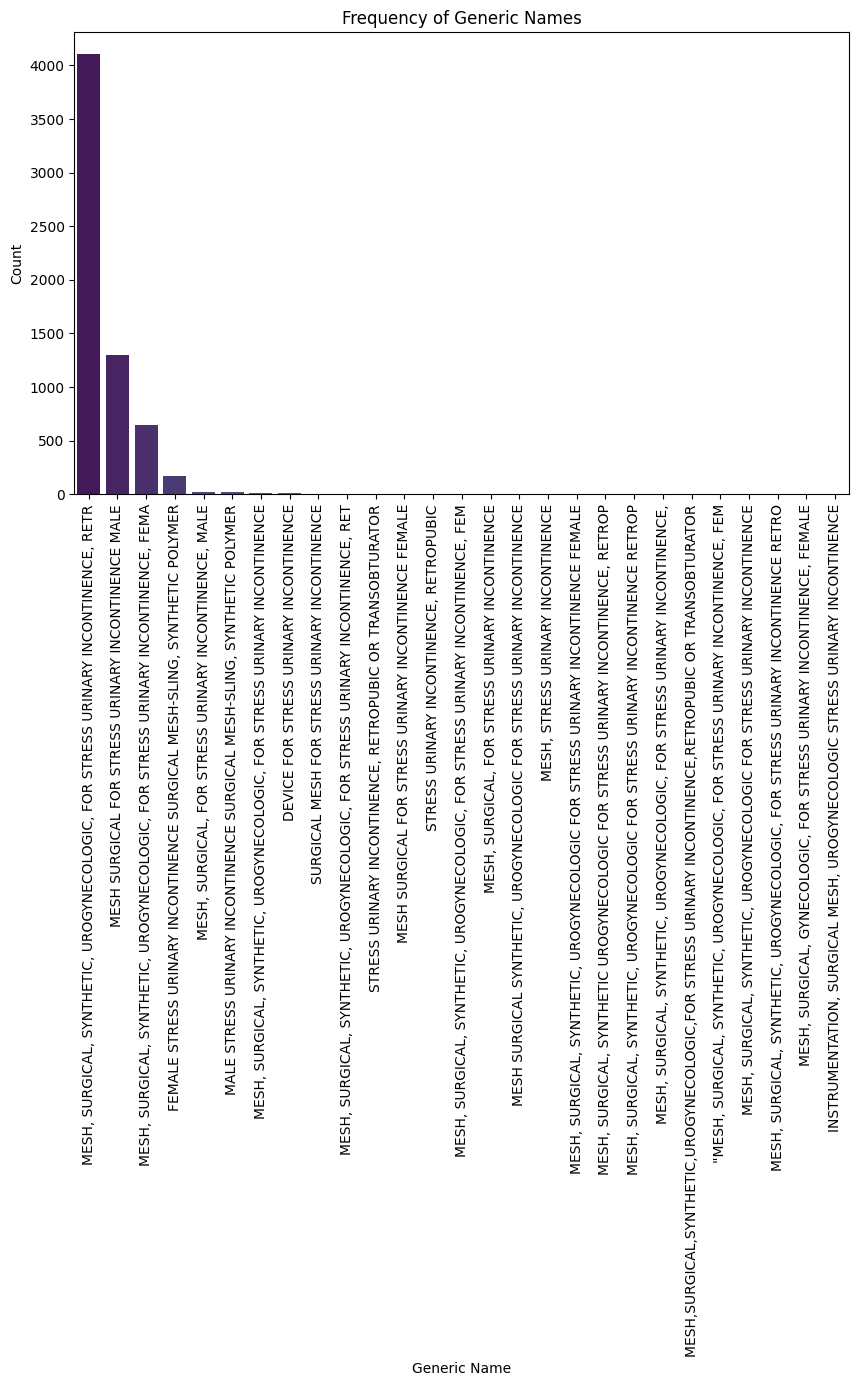

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Frequency of Generic Names')
plt.xlabel('Generic Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [29]:
merged_files_filtered["GENERIC_NAME"].count()

6312

In [36]:
merged_years = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

In [45]:
year_counts = merged_years.dt.year.value_counts().sort_index()

In [46]:
year_counts

DATE_RECEIVED
2017     641
2018     663
2019    1256
2020    1245
2022    1394
2023    1113
Name: count, dtype: int64

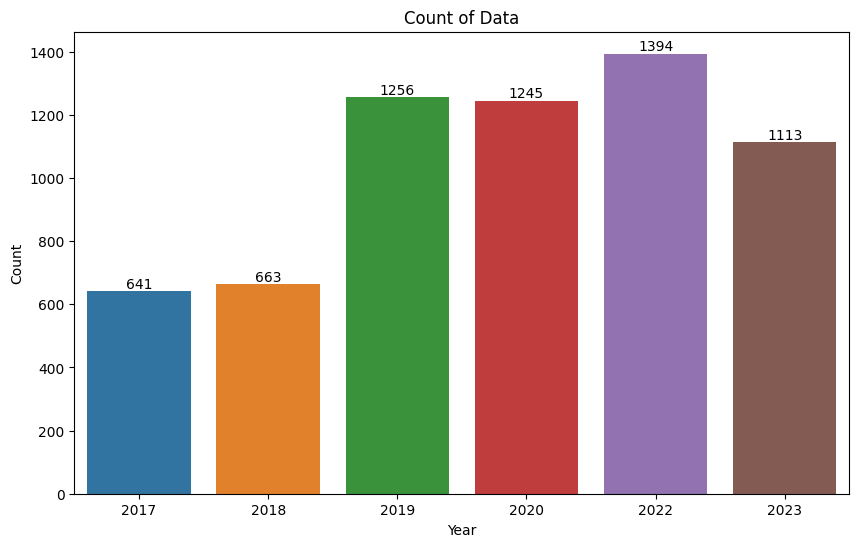

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
for index, value in enumerate(year_counts.values):
    plt.text(index, value+10, str(value), ha='center')
plt.title('Count of Data')
plt.xlabel('Year')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()

In [ ]:
merged_files_filtered["DATE_RECEIVED"]

In [28]:
"STRESS URINARY INCONTINENCE".lower()

'stress urinary incontinence'

In [30]:
merged_files_filtered.to_csv('./data/stress_urinary_incontinence.csv')

In [31]:
patient_text = merged_files_filtered["FOI_TEXT"].dropna()

In [32]:
patient_text.shape

(6312,)

In [33]:
merged_files_filtered.columns

Index(['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC'],
      dtype='object')

In [42]:
merged_files_filtered["FOI_TEXT"].str.contains("PAIN|INFECTION|SICK|BLEEDING|EROSION|SEVERE|DEMAGE|TIGHT|HEALTH PROBLEM|ABNORMAL|ANXIETY|NEGATIVE|DIFFICULT|ACHES|PAINFUL|DIARRHEA|BOWEL OBSTRUCTION|INCONTINENCE|DIED|BOWEL PROBLEMS|ANAL|DYSPAREUNIA|PAINfUL SEXUAL INTERCOURSE|REMOVAL|COME OUT|WEAKNESS|NUMBNESS").value_counts()


FOI_TEXT
False    726
True     387
Name: count, dtype: int64

In [34]:
mesh_text = ' '.join(str(review) for review in patient_text )
mesh_text

'BASED ON ADDITIONAL INFORMATION RECEIVED THIS COMPLAINT IS NOT A MEDTRONIC PRODUCT. IF INFORMATION IS PROVIDED IN THE FUTURE, A SUPPLEMENTAL REPORT WILL BE ISSUED. BASED ON ADDITIONAL INFORMATION RECEIVED THIS COMPLAINT IS NOT A MEDTRONIC PRODUCT. IF INFORMATION IS PROVIDED IN THE FUTURE, A SUPPLEMENTAL REPORT WILL BE ISSUED. MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDENT DATE WAS NOT PROVIDED. LOT NUMBER NOT PROVIDED. UDI NOT PROVIDED RE-PROCESSING INFORMATION NOT PROVIDED. SINCE THE LOT NUMBER WAS NOT PROVIDED, THIS INFORMATION CANNOT BE DETERMINED. THE PATIENT\'S ATTORNEY ALLEGED A DEFICIENCY AGAINST THE DEVICE RESULTING IN AN UNSPECIFIED ADVERSE OUTCOME. PRODUCT WAS USED FOR THERAPEUTIC TREATMENT. THE PREOPERATIVE AND POSTOPERATIVE DIAGNOSIS WAS GENUINE ADENOMYOSIS, UTEROVAGINAL PROLAPSE, GENUINE STRESS URINARY INCONTINENCE, CYSTOCELE, AND RECTOCELE. THE PROCEDURE PERFORMED WAS A TOTAL VAGINAL HYSTERECTOMY, SUBURETHRAL SLING PROCEDURE WITH MESH, ANTERIOR REPAIR, POSTERIOR REPAIR,

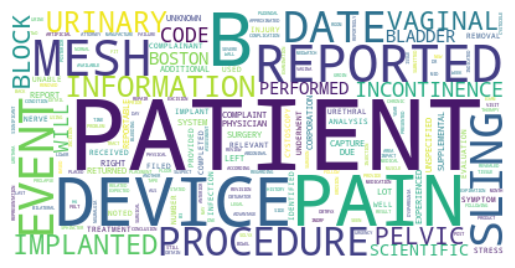

In [35]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()